In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

import graphviz


import matplotlib.image as mpimg

In [25]:
digits = load_digits()

In [26]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

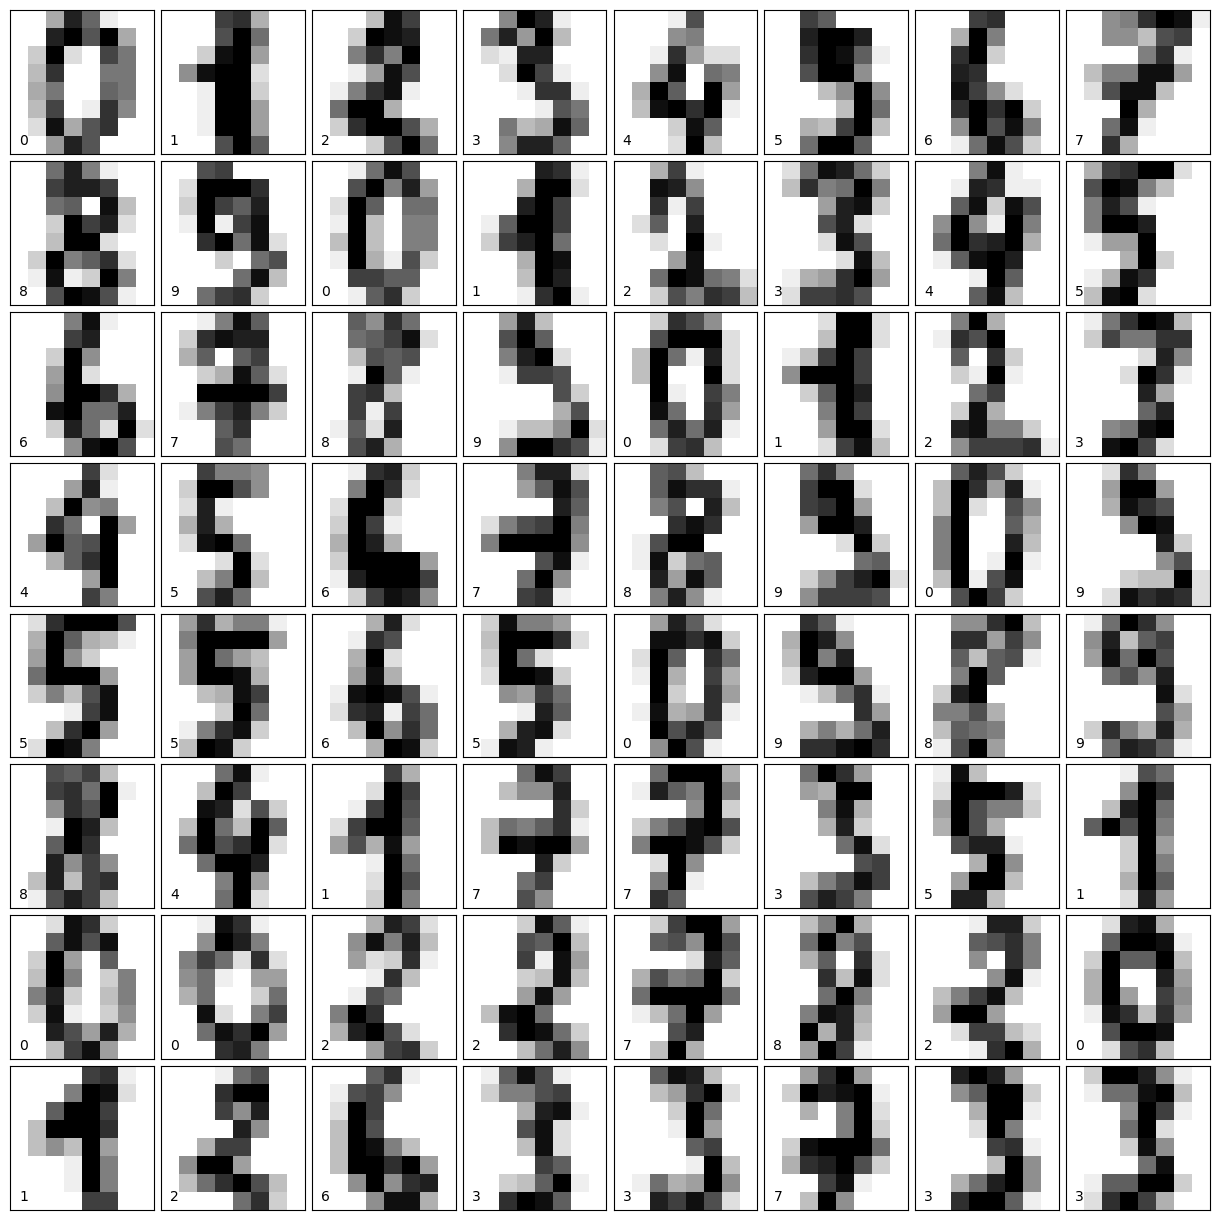

In [27]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0, right=1,
                    bottom=0, top=1,
                    hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],
              cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0,7, str(digits.target[i]))

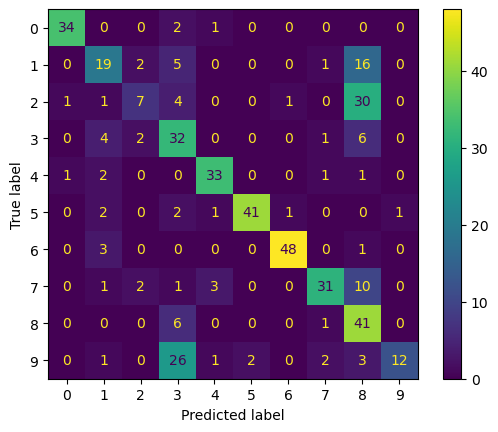

0.6622222222222223

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

clf = DecisionTreeClassifier(max_depth = 5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()

plt.show()

accuracy_score(y_test, y_pred)

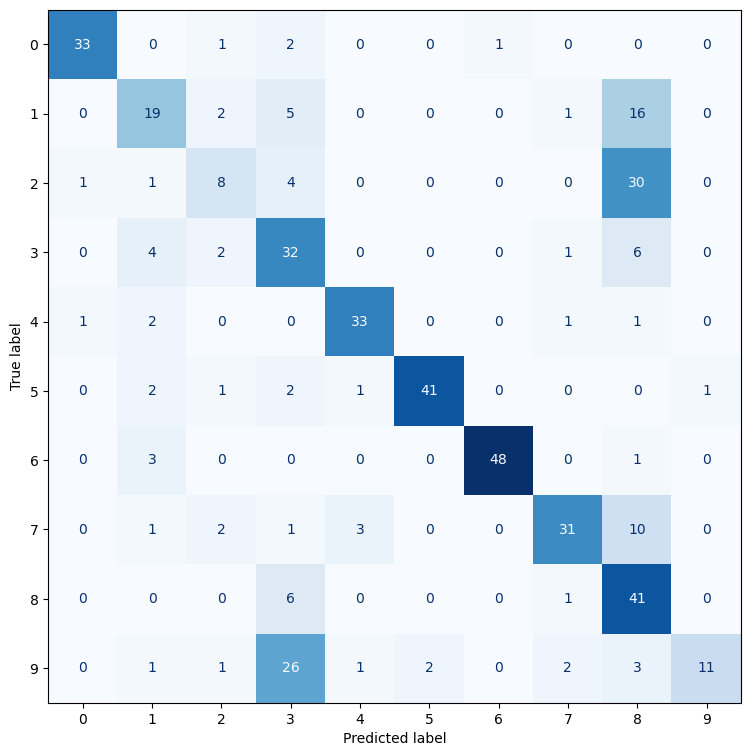

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

clf = DecisionTreeClassifier(max_depth = 5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = digits.target_names)

fig, ax = plt.subplots(figsize = (9,9))

disp.plot(ax = ax, cmap = plt.cm.Blues, colorbar = False)

ax.grid(False)


RF: max_depth =   3 | F! Score :  0.8723
RF: max_depth =   5 | F! Score :  0.9311
RF: max_depth =  10 | F! Score :  0.9778


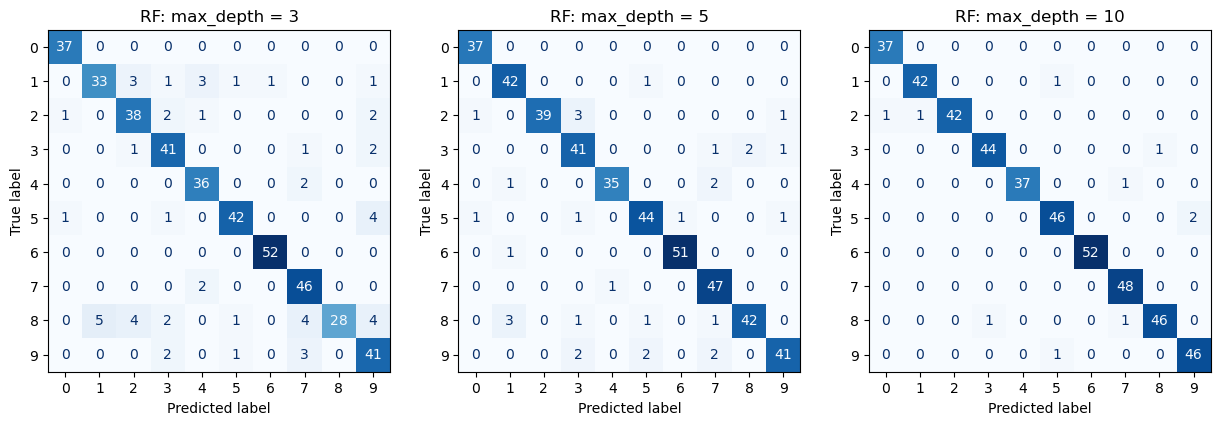

In [30]:

fig, axes = plt.subplots(1,3,figsize=(15,8))

for i, max_depth in enumerate([3,5,10]):
    clf = RandomForestClassifier(max_depth=max_depth).fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    print("RF: max_depth = {:3d}".format(max_depth), end=' | ')
    print("F! Score : {: .4f}".format(f1_score(y_test,y_pred, average='weighted')))

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)

    disp.plot(ax = axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title("RF: max_depth = {0}".format(max_depth))
    axes[i].grid(False)


In [31]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
xg_clf = xgb.XGBClassifier(tree_method='hist',
                           random_state=RANDOM_STATE,
                           verbosity=1)
params = {'max_depth': [3,5,6,10,15,20],
          'learning_rate': [0.01,0.1,0.2,0.3],
          'subsample': np.arange(0.5,1.0,0.1),
          'colsample_bytree': np.arange(0.4,1.0,0.1),
          'colsample_bylevel': np.arange(0.4,1.0,0.1),
          'n_estimators': [100,500,1000]}

clf = RandomizedSearchCV(estimator=xg_clf, param_distributions=params, scoring='accuracy', n_iter=25, verbose=1)

clf.fit(X_train, y_train)
print("Best Parameters: ", clf.best_params_)
print("Best Accuracy: ", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters:  {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}
Best Accuracy:  0.9732782596723117
